## Comcast Data Analysis

In [ ]:
#import required librarires
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
#import Comcast dataset csv file in Dataframe
comcast_df = pd.read_csv('Comcast_telecom_complaints_data.csv', parse_dates=['Date'])

In [ ]:
#preview the camcast data
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [ ]:
# checking column data types
print(comcast_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [ ]:
# extract month and day into new coulmns
comcast_df['year'] = comcast_df['Date'].dt.year
comcast_df['month'] = comcast_df['Date'].dt.month
comcast_df['day'] = comcast_df['Date'].dt.day
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,year,month,day
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,4,22
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,4,8
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,4,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,5,7
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,5,26


In [ ]:
comcast_df['year'].unique()

array([2015])

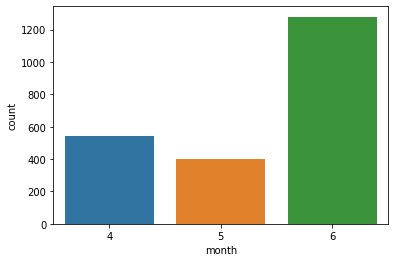

In [ ]:
# Monthly trends of number of complaints  
sns.countplot(x=comcast_df['month'])

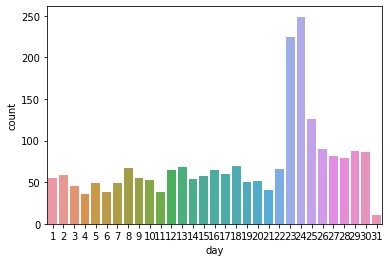

In [ ]:
# Daily trends of number of complaints  
sns.countplot(x=comcast_df['day'])

In [ ]:
# Frequency of complain types
comcast_df['Customer Complaint'].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

In [ ]:
# Complaints with the highest frequency
comcast_df['Customer Complaint'].value_counts().index[0]

'Comcast'

In [ ]:
comcast_df[comcast_df['Customer Complaint'] == 'Comcast'] 

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,year,month,day
35,354116,Comcast,2015-06-20,20-Jun-15,5:03:09 PM,Internet,Alpharetta,Georgia,30022,Solved,No,2015,6,20
37,373874,Comcast,2015-06-30,30-Jun-15,12:24:57 AM,Customer Care Call,Alvin,Texas,77511,Solved,No,2015,6,30
47,309379,Comcast,2015-05-27,27-May-15,1:50:37 PM,Internet,Ann Arbor,Michigan,48105,Solved,No,2015,5,27
61,352100,Comcast,2015-06-19,19-Jun-15,2:36:57 PM,Internet,Arlington,Virginia,22206,Open,No,2015,6,19
91,307799,Comcast,2015-05-26,26-May-15,4:29:57 PM,Customer Care Call,Atlanta,Georgia,30318,Solved,No,2015,5,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,284195,Comcast,2015-05-11,05-Nov-15,5:25:20 PM,Internet,Westfield,Massachusetts,1085,Open,No,2015,5,11
2170,359831,Comcast,2015-06-23,23-Jun-15,7:09:28 PM,Customer Care Call,Westminster,Maryland,21158,Open,No,2015,6,23
2180,247649,Comcast,2015-04-21,21-Apr-15,2:04:59 PM,Internet,Wilmington,Delaware,19805,Closed,Yes,2015,4,21
2189,360139,Comcast,2015-06-23,23-Jun-15,8:48:09 PM,Customer Care Call,Windsor,Colorado,80550,Solved,No,2015,6,23


In [ ]:
# Complaints with the lowest frequency
comcast_df['Customer Complaint'].value_counts().index[-1]

'Comcast, Ypsilanti MI Internet Speed'

In [ ]:
comcast_df[comcast_df['Customer Complaint'] == 'Comcast, Ypsilanti MI Internet Speed'] 

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,year,month,day
2223,363614,"Comcast, Ypsilanti MI Internet Speed",2015-06-24,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes,2015,6,24


In [ ]:
# Create a new categorical variable with value as Open and Closed
#create a list of conditions
conditions = [
    (comcast_df['Status'] == 'Open'),
    (comcast_df['Status'] == 'Pending'),
    (comcast_df['Status'] == 'Closed'),
    (comcast_df['Status'] == 'Solved'),
]

# create a list of values we want to assign to each condition
values = ['Open', 'Open', 'Closed', 'Closed']

#create a new column and use np.select to assign values to using our list arguements
comcast_df['status_summary'] = np.select(conditions, values)

In [ ]:
# del comcast_df['status_summary']

In [ ]:
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,year,month,day,status_summary
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,4,22,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,4,8,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,4,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,5,7,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,5,26,Closed


In [ ]:
comcast_df.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,year,month,day,status_summary
2219,213550,Service Availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015,4,2,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015,6,2,Closed
2221,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015,6,9,Closed
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015,6,23,Closed
2223,363614,"Comcast, Ypsilanti MI Internet Speed",2015-06-24,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes,2015,6,24,Open


In [ ]:
#comcast_df.groupby(['State'])['Customer Complaint'].value_counts().max()
# comcast_df.groupby(['State']).groups
#comcast_df.groupby(['State','Customer Complaint']).groups

In [ ]:
#grouped = comcast_df.groupby('State')
#grouped = comcast_df.groupby(['State','Customer Complaint']).groups
#for name,group in grouped:
   #print (name)
   #print (group)

In [ ]:
 # sns.countplot(comcast_df.groupby(['State'])['Customer Complaint'].value_counts())

In [ ]:
grouped = comcast_df.groupby('State')
chart = grouped['Customer Complaint'].size()
print(chart)

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [ ]:
df = pd.DataFrame(data=chart)
df.sort_values(by=['Customer Complaint'], inplace=True, ascending=False)
df.head()

,Customer Complaint
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


In [ ]:
# state with the maximum complaints
# Georgia

In [ ]:
comcast_df.groupby(['status_summary', 'State']).max()

Ticket #  \
status_summary State                    
Closed         Alabama         363900   
               Arizona         368168   
               Arkansas        362556   
               California      375439   
               Colorado        370930   
...                               ...   
Open           Utah            370691   
               Vermont         339548   
               Virginia        370538   
               Washington      375809   
               West Virginia   373879   

                                                             Customer Complaint  \
status_summary State                                                              
Closed         Alabama                                        monthly data caps   
               Arizona        comcast is changing my paper bill to ecobill w...   
               Arkansas                                        xfinity Internet   
               California     unfair pricing and raising of pricing and char...   
               Colorado                        no warning before price increase   
...                                                                         ...   
Open           Utah                                            Speed Throttling   
               Vermont                                      Internet Throttling   
               Virginia              without service despite willingness to pay   
               Washington                  tInternet Service Provider Complaint   
               West Virginia  Service refusal and lower than advertised speeds.   

                                   Date Date_month_year        Time  \
status_summary State                                                  
Closed         Alabama       2015-06-25       25-Jun-15  9:50:19 AM   
               Arizona       2015-06-26       29-May-15  9:52:27 PM   
               Arkansas      2015-06-24       24-Jun-15  7:27:25 PM   
               California    2015-06-30       30-Jun-15  9:59:29 PM   
               Colorado      2015-06-28       31-May-15  9:33:54 PM   
...                                 ...             ...         ...   
Open           Utah          2015-06-28       30-May-15  9:21:41 PM   
               Vermont       2015-06-13       13-Jun-15  9:21:20 PM   
               Virginia      2015-06-27       30-May-15  9:49:33 AM   
               Washington    2015-06-30       31-May-15  9:28:16 AM   
               West Virginia 2015-06-30       30-Jun-15  8:16:57 PM   

                             Received Via                City  Zip code  \
status_summary State                                                      
Closed         Alabama           Internet           Tuscumbia     36609   
               Arizona           Internet              Tucson     85749   
               Arkansas          Internet   North Little Rock     72223   
               California        Internet             Windsor     95966   
               Colorado          Internet             Windsor     81623   
...                                   ...                 ...       ...   
Open           Utah              Internet  Washington Terrace     84405   
               Vermont           Internet        Saint Albans      5478   
               Virginia          Internet          Woodbridge     23831   
               Washington        Internet              Vashon     99212   
               West Virginia     Internet          Morgantown     26508   

                               Status Filing on Behalf of Someone  year  \
status_summary State                                                      
Closed         Alabama         Solved                         Yes  2015   
               Arizona         Solved                         Yes  2015   
               Arkansas        Solved                          No  2015   
               California      Solved                         Yes  2015   
               Colorado        Solved                         Yes

In [ ]:
# resolved complaints received through the Internet
len(comcast_df[(comcast_df['status_summary'] =='Closed') & (comcast_df['Received Via'] == 'Internet')])

843

In [ ]:
# resolved complaints received through customer care calls
len(comcast_df[(comcast_df['status_summary'] =='Closed') & (comcast_df['Received Via'] == 'Customer Care Call')])

864

In [ ]:
# percentage of complaints resolved received through the Internet and customer care calls
(comcast_df['status_summary'].value_counts(normalize=True)) *100

Closed    76.753597
Open      23.246403
Name: status_summary, dtype: float64